In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [17]:
df = pd.read_csv('air_passengers.csv', parse_dates=['Date'], index_col='Date')

In [18]:
df = df.sort_index()

In [19]:
train_size = 0.8  
split_index = int(len(df) * train_size)

train = df.iloc[:split_index]
test = df.iloc[split_index:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (115, 1)
Test shape: (29, 1)


In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

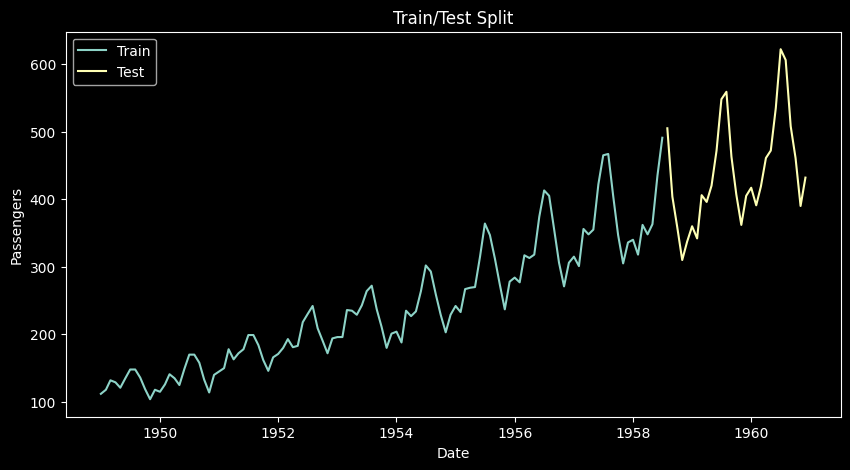

In [21]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [22]:
def create_features(data, n_lag=1):
    X, y = [], []
    for i in range(n_lag, len(data)):
        X.append(data[i-n_lag:i, 0]) 
        y.append(data[i, 0]) 
    return np.array(X), np.array(y)

X_train, y_train = create_features(train_scaled, n_lag=1)
X_test, y_test = create_features(test_scaled, n_lag=1)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_train = model.predict(X_train) 
y_pred_test = model.predict(X_test) 

y_pred_train_original = scaler.inverse_transform(y_pred_train.reshape(-1, 1))  
y_pred_test_original = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

In [28]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Mean Absolute Error: 0.1173
Mean Squared Error: 0.0186


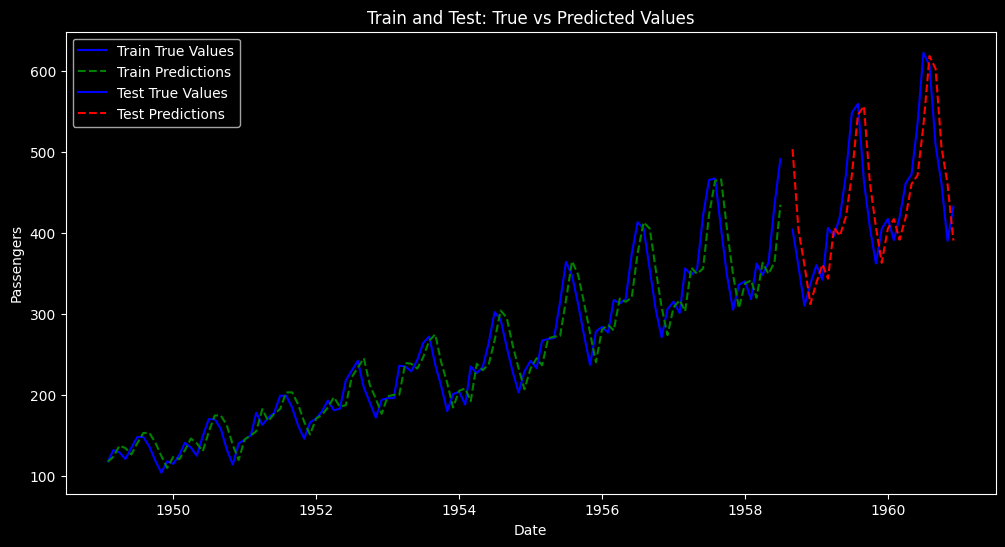

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(train.index[1:], scaler.inverse_transform(y_train.reshape(-1, 1)), label='Train True Values', color='blue')  # Тренировочные реальные значения
plt.plot(train.index[1:], y_pred_train_original, label='Train Predictions', color='green', linestyle='--')  # Тренировочные предсказания

plt.plot(test.index[1:], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Test True Values', color='blue')  # Тестовые реальные значения
plt.plot(test.index[1:], y_pred_test_original, label='Test Predictions', color='red', linestyle='--')  # Тестовые предсказания

plt.title('Train and Test: True vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()